# Getting input and output tensors' shapes for all layers

Sometimes it's necessary to get information about what's going on with the data shape during a forward pass in deep neural networks. For example, some models allow the usage of various input spatial size and, in that case, you may want to know the output tensors' shapes. OpenCV has an option to get all shapes for all tensors (including intermediate tensors) without inference. This recipe reviews ways of using such functionality along with other useful routines relevant to neural nets.

The `getLayersShapes` function of the `Net` class from the `cv2.dnn` module computes all tensor shapes. It accepts shape as input, a list of four integers. The elements in the list are the number of examples, number of channels, width, and height of the input tensor. The function returns a tuple of three elements: a list of layer identifiers in the model, a list of input tensor shapes for each layer, and a list of output tensor shapes also for each layer. The list of layer identifiers is necessary when we want to get some additional information about the layers, because some functions of `cv2.dnn_Net` accept identifiers from this list. Returned lists for the input and output shapes contain all the shapes for all of the outputs of the layers. Since each layer can have several inputs and outputs, these returned lists contain lists of NumPy integer arrays of length `4`.

Also, we've used some other functions in the previous code. Let's discuss them too. The `empty` function of `cv2.dnn_Net` returns `True` if the network doesn't contain any layers; it can be used to check whether the model was loaded or not.

The `getLayerTypes` function returns all layer types that are used in the model. This information can help you to get a basic idea about the model. The `getLayersCount` function gets the layer type and returns a number of layers with specified type. The `getLayerNames` function gives you all of the names for the layers in the model. Basically, neural net models contain names for the layers and they are preserved during loading and parsing. These names are returned by the `getLayerNames` function.



In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


In [2]:
#https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet
net = cv2.dnn.readNetFromCaffe('../data/bvlc_googlenet.prototxt', 
                               '../data/bvlc_googlenet.caffemodel')

if not net.empty():
    print('Net loaded successfully\n')
    
print('Net contains:')
for t in net.getLayerTypes():
    print('\t%d layers of type %s' % (net.getLayersCount(t), t))

Net loaded successfully

Net contains:
	9 layers of type Concat
	57 layers of type Convolution
	1 layers of type Dropout
	1 layers of type InnerProduct
	2 layers of type LRN
	14 layers of type Pooling
	57 layers of type ReLU
	1 layers of type Softmax
	1 layers of type __NetInputLayer__


In [3]:
layers_ids, in_shapes, out_shapes = net.getLayersShapes([1, 3, 224, 224])

layers_names = net.getLayerNames()

print('Net layers shapes:')
for l in range(len(layers_names)):
    in_num, out_num = len(in_shapes[l]), len(out_shapes[l])
    print('Layer "%s" has %d input(s) and %d output(s)'% (layers_names[l],in_num, out_num))
    
    for i in range(in_num):
        print('\tinput #%d has shape' % i, in_shapes[l][i].flatten())
    for i in range(out_num):
        print('\toutput #%d has shape' % i, out_shapes[l][i].flatten())

Net layers shapes:
Layer "conv1/7x7_s2" has 1 input(s) and 1 output(s)
	input #0 has shape [  1   3 224 224]
	output #0 has shape [  1   3 224 224]
Layer "conv1/relu_7x7" has 1 input(s) and 1 output(s)
	input #0 has shape [  1   3 224 224]
	output #0 has shape [  1  64 112 112]
Layer "pool1/3x3_s2" has 1 input(s) and 1 output(s)
	input #0 has shape [  1  64 112 112]
	output #0 has shape [  1  64 112 112]
Layer "pool1/norm1" has 1 input(s) and 1 output(s)
	input #0 has shape [  1  64 112 112]
	output #0 has shape [ 1 64 56 56]
Layer "conv2/3x3_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [ 1 64 56 56]
	output #0 has shape [ 1 64 56 56]
Layer "conv2/relu_3x3_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [ 1 64 56 56]
	output #0 has shape [ 1 64 56 56]
Layer "conv2/3x3" has 1 input(s) and 1 output(s)
	input #0 has shape [ 1 64 56 56]
	output #0 has shape [ 1 64 56 56]
Layer "conv2/relu_3x3" has 1 input(s) and 1 output(s)
	input #0 has shape [ 1 64 56 56]
	output

Layer "inception_5b/relu_1x1" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 832   7   7]
	output #0 has shape [  1 384   7   7]
Layer "inception_5b/3x3_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 384   7   7]
	output #0 has shape [  1 384   7   7]
Layer "inception_5b/relu_3x3_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 832   7   7]
	output #0 has shape [  1 192   7   7]
Layer "inception_5b/3x3" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 192   7   7]
	output #0 has shape [  1 192   7   7]
Layer "inception_5b/relu_3x3" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 192   7   7]
	output #0 has shape [  1 384   7   7]
Layer "inception_5b/5x5_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 384   7   7]
	output #0 has shape [  1 384   7   7]
Layer "inception_5b/relu_5x5_reduce" has 1 input(s) and 1 output(s)
	input #0 has shape [  1 832   7   7]
	output #0 has shape [ 1 48  7  7]
Layer "inception_5b/5x5" 

# [Deep learning tutorial on Caffe technology : basic commands, Python and C++ code.](https://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html)

# [gwding/draw_convnet](https://github.com/gwding/draw_convnet)


# [How to draw Deep learning network architecture diagrams?](https://datascience.stackexchange.com/questions/14899/how-to-draw-deep-learning-network-architecture-diagrams)

# [craffel/draw_neural_net.py](https://gist.github.com/craffel/2d727968c3aaebd10359)

In [4]:
# https://gist.github.com/craffel/2d727968c3aaebd10359
try:
    # Python 2
    xrange
except NameError:
    # Python 3, xrange is now named range
    xrange = range

def draw_neural_net_old(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

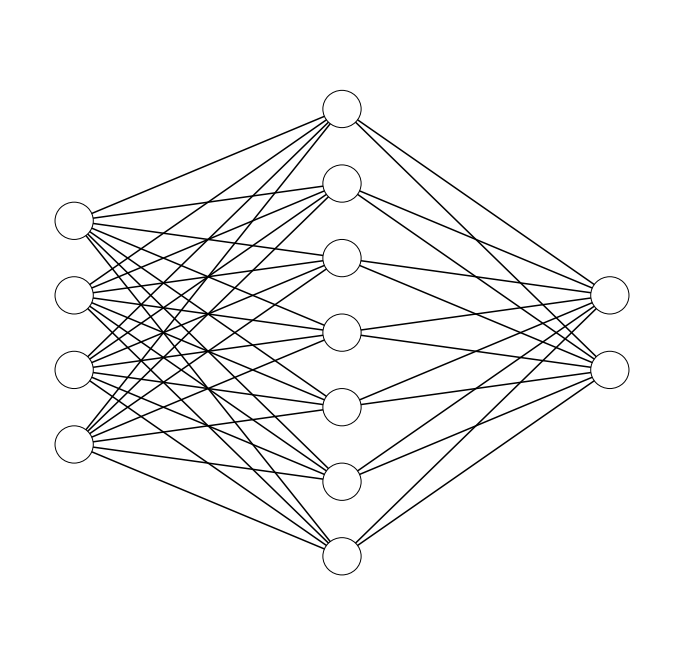

In [5]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net_old(ax, .1, .9, .1, .9, [4, 7, 2])
fig.savefig('nn.png')

# [dvgodoy/draw_neural_net.py](https://gist.github.com/dvgodoy/0db802cfb8edd488dfbd524302ca4be7)

In [6]:
# https://gist.github.com/craffel/2d727968c3aaebd10359
# FINALIZED:
# https://gist.github.com/dvgodoy/0db802cfb8edd488dfbd524302ca4be7
try:
    # Python 2
    xrange
except NameError:
    # Python 3, xrange is now named range
    xrange = range

## Gist originally developed by @craffel and improved by @ljhuang2017

import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, coefs_, intercepts_, n_iter_, loss_):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[0]):
        plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  
                  lw =1, head_width=0.01, head_length=0.02)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,
                                color='w', ec='k', zorder=4)
            if n == 0:
                plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
            elif (n_layers == 3) & (n == 1):
                plt.text(n*h_spacing + left+0.00, 
                         layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), 
                         r'$H_{'+str(m+1)+'}$', fontsize=15)
            elif n == n_layers -1:
                plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, 
                         r'$y_{'+str(m+1)+'}$', fontsize=15)
            ax.add_artist(circle)
    # Bias-Nodes
    for n, layer_size in enumerate(layer_sizes):
        if n < n_layers -1:
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005
            circle = plt.Circle((x_bias, y_bias), v_spacing/8., color='w', ec='k', zorder=4)
            plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$1$', fontsize=15)
            ax.add_artist(circle)   
    # Edges
    # Edges between nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                plt.text( xm1, ym1, str(round(coefs_[n][m, o],4)),
                         rotation = rot_mo_deg, fontsize = 10)
    # Edges between bias and nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        if n < n_layers-1:
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        x_bias = (n+0.5)*h_spacing + left
        y_bias = top + 0.005 
        for o in xrange(layer_size_b):
            line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                          [y_bias, layer_top_b - o*v_spacing], c='k')
            ax.add_artist(line)
            xo = ((n + 1)*h_spacing + left)
            yo = (layer_top_b - o*v_spacing)
            rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
            rot_bo_deg = rot_bo_rad*180./np.pi
            xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
            yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
            xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
            yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
            plt.text( xo1, yo1, str(round(intercepts_[n][o],4)), 
                     rotation = rot_bo_deg, fontsize = 10)    
                
    # Output-Arrows
    layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[-1]):
        plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  
                  lw =1, head_width=0.01, head_length=0.02)
    # Record the n_iter_ and loss
    plt.text(left + (right-left)/3., bottom - 0.005*v_spacing, 
             'Steps:'+str(n_iter_)+'    Loss: ' + str(round(loss_, 6)), fontsize = 15)

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


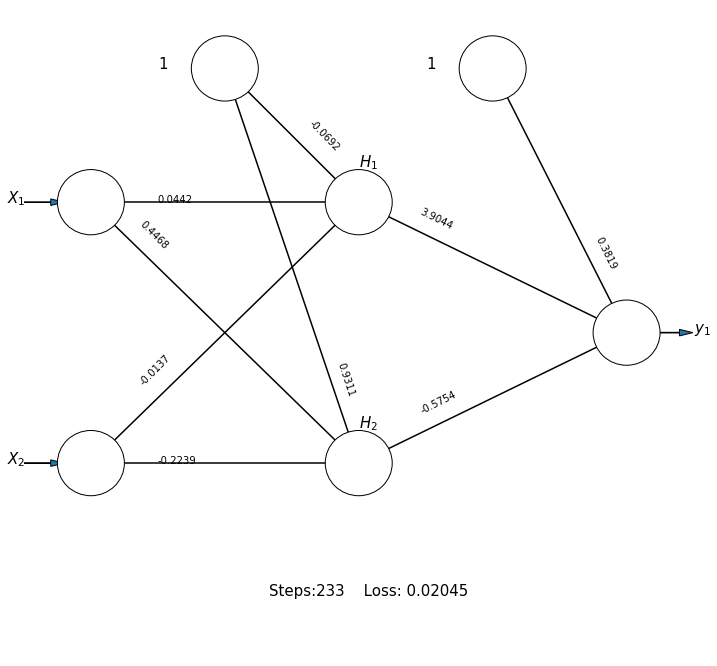

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier as MLP
#from draw_neural_net import draw_neural_net

#--------[1] Input data
dataset = np.mat('-1 -1 -1; -1 1 1; 1 -1 1; 1 1 -1')
X_train = dataset
y_train = np.mat('0; 1; 1; 0')
#-----2-2-1
my_hidden_layer_sizes= (2,)
#------2-2-8-1
#my_hidden_layer_sizes= (2, 8,)
#------2-16-16-1
#my_hidden_layer_sizes= (16, 16,)


XOR_MLP = MLP(
    activation='tanh',
    alpha=0.,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes= my_hidden_layer_sizes,
    learning_rate='constant',
    learning_rate_init = 0.1,
    max_iter=5000,
    momentum=0.5,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=0,
    shuffle=True,
    solver='sgd',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False)

XOR_MLP.fit(X_train,y_train)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

layer_sizes = [2] + list(my_hidden_layer_sizes) + [1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, 
                XOR_MLP.coefs_, XOR_MLP.intercepts_, 
                XOR_MLP.n_iter_, XOR_MLP.loss_)
fig.savefig('nn_digaram_2.png')

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


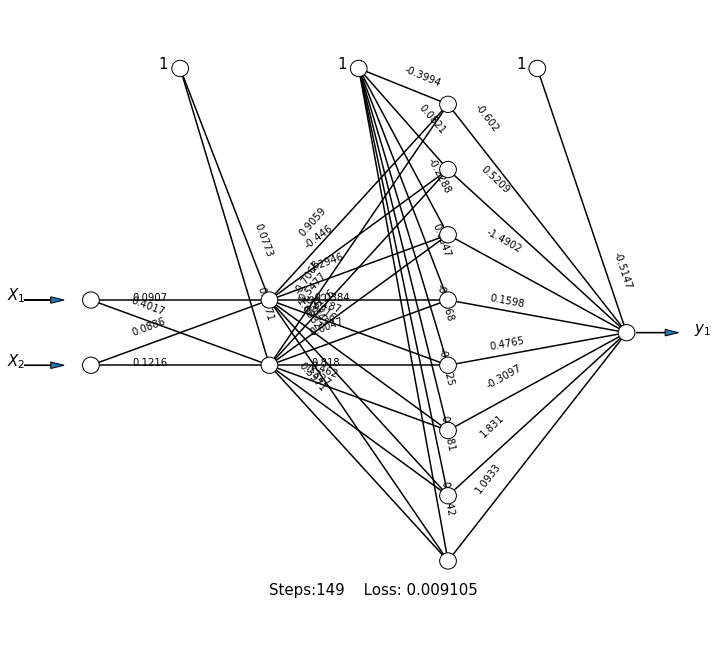

In [8]:
#------2-2-8-1
my_hidden_layer_sizes= (2, 8,)
#------2-16-16-1
#my_hidden_layer_sizes= (16, 16,)
XOR_MLP = MLP(
    activation='tanh',
    alpha=0.,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes= my_hidden_layer_sizes,
    learning_rate='constant',
    learning_rate_init = 0.1,
    max_iter=5000,
    momentum=0.5,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=0,
    shuffle=True,
    solver='sgd',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False)

XOR_MLP.fit(X_train,y_train)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

layer_sizes = [2] + list(my_hidden_layer_sizes) + [1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, 
                XOR_MLP.coefs_, XOR_MLP.intercepts_, 
                XOR_MLP.n_iter_, XOR_MLP.loss_)
fig.savefig('nn_digaram_2_8.png')

# [yu4u/convnet-drawer](https://github.com/yu4u/convnet-drawer)